In [1]:
cd ..

/home/wesg/research/ordinal-probing


In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import torch
from scipy.stats import rankdata
from load import load_model
import datasets
import seaborn as sns
import geopandas as gpd

from feature_datasets.common import *
import utils
import os
from probes.evaluation import *

from probe_experiment import load_probe_results

%matplotlib inline

In [3]:
world_df = load_entity_data('world_place')
us_df = load_entity_data('us_place')
nyc_df = load_entity_data('nyc_place')
art_df = load_entity_data('art')
headline_df = load_entity_data('headline')
figure_df = load_entity_data('historical_figure')

In [25]:
world_df.sort_values('page_views', ascending=False).groupby('entity_type').head(50).sample(20)


,name,entity_subtype,country,latitude,longitude,has_thumbnail,page_views,entity_type,total_area,population,is_test
29306,Cape Town,PopulatedPlace,South_Africa,-33.92530,18.423900,1,2965356.0,populated_place,2.461000e+09,4710000.0,False
5931,Lakhta Center,Building,Russia,59.98710,30.177000,1,676342.0,structure,NaN,NaN,False
27724,Detroit,PopulatedPlace,United_States,42.33140,-83.099500,1,4586148.0,populated_place,3.700830e+08,639111.0,False
38656,Lake Michigan,Lake,United_States,44.00000,-87.000000,1,1281435.0,natural_place,5.802610e+10,NaN,True
36092,Jonestown,PopulatedPlace,Guyana,7.68944,-59.950000,1,7715886.0,populated_place,NaN,930.0,False
38618,Lake Erie,Lake,United_States,42.20000,-81.200000,1,1072262.0,natural_place,2.566680e+10,NaN,False
5873,Chernobyl New Safe Confinement,Building,Ukraine,51.38930,30.093200,1,1433538.0,structure,NaN,NaN,True
31827,Mecca,PopulatedPlace,Saudi_Arabia,21.42250,39.823300,1,3471573.0,populated_place,1.200000e+09,1578722.0,False
37513,Adirondack Mountains,MountainRange,United_States,44.11250,-73.923900,1,762286.0,natural_place,NaN,NaN,False
20976,Brooklyn,PopulatedPlace,United_States,40.69280,-73.990300,1,14990510.0,populated_place,2.512290e+08,2736074.0,False


In [ ]:
"Los Angeles", "St. Peter's Basilica," "Caspian Sea"

In [14]:
data_table = {
    'World Places': (len(world_df), ["Los Angeles", "St. Peter's Basilica," "Caspian Sea"]),
    'US Places': (len(us_df), ["Fenway Park", "Columbia University", "Riverside County"]),
    'NYC Places': (len(nyc_df), ["Borden Avenue Bridge", "Trump International Hotel"]),
    'Historical Figures': (len(figure_df), ["Cleopatra", "Dante Alighieri", "Carl Sagan"]),
    'Entertainment': (len(art_df), ["Stephen Kings' It", "Queen's Bohemian Rhapsody"]),
    'Headlines': (len(headline_df), ["Pilgrims, Fewer and Socially Distanced, Arrive in Mecca for Annual Hajj"]),
}

In [15]:
data_table

{'World Places': (39585, ['Los Angeles', "St. Peter's Basilica,Caspian Sea"]),
 'US Places': (29997,
  ['Fenway Park', 'Columbia University', 'Riverside County']),
 'NYC Places': (19838, ['Borden Avenue Bridge', 'Trump International Hotel']),
 'Historical Figures': (37539, ['Cleopatra', 'Dante Alighieri', 'Carl Sagan']),
 'Entertainment': (31321, ["Stephen Kings' It", "Queen's Bohemian Rhapsody"]),
 'Headlines': (28389,
  ['Pilgrims, Fewer and Socially Distanced, Arrive in Mecca for Annual Hajj'])}

In [6]:
data_table = {
    'World Places': (len(world_df)),
    'US Places': (len(us_df)),
    'NYC Places': (len(nyc_df)),
    'Historical Figures': (len(figure_df)),
    'Entertainment': (len(art_df)),
    'Headlines': (len(headline_df)),
}

In [7]:
data_table

{'World Places': 39585,
 'US Places': 29997,
 'NYC Places': 19838,
 'Historical Figures': 37539,
 'Entertainment': 31321,
 'Headlines': 28389}

In [8]:
from feature_datasets.space_world import COUNTRY_CONTINENTS
world_df['continent'] = world_df.country.apply(lambda x: COUNTRY_CONTINENTS.get(x, ''))

In [9]:
state_coloring = {
    'AL': 2, 
    'AR': 2, 
    'AZ': 1, 
    'CA': 0, 
    'CO': 4, 
    'CT': 2, 
    'DC': 2, 
    'DE': 2, 
    'FL': 1, 
    'GA': 0, 
    'IA': 1, 
    'ID': 0, 
    'IL': 3, 
    'IN': 0, 
    'KS': 3, 
    'KY': 2, 
    'LA': 4, 
    'MA': 0, 
    'MD': 1, 
    'ME': 0, 
    'MI': 2, 
    'MN': 2, 
    'MO': 0, 
    'MS': 0, 
    'MT': 2, 
    'NC': 2, 
    'ND': 4, 
    'NE': 2, 
    'NH': 1, 
    'NJ': 3, 
    'NM': 5, 
    'NV': 3, 
    'NY': 1, 
    'OH': 5, 
    'OK': 1, 
    'OR': 1, 
    'PA': 0, 
    'RI': 4, 
    'SC': 5, 
    'SD': 0, 
    'TN': 1, 
    'TX': 0, 
    'UT': 2, 
    'VA': 0, 
    'VT': 2, 
    'WA': 4, 
    'WI': 0, 
    'WV': 3, 
    'WY': 1
}
STATE_COLOR_CODES = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#2ca02c',
    3: '#d62728',
    4: '#9467bd',
    5: '#e377c2',
}

CONTINENT_COLOR_CODES = {
    'North America': '#1f77b4',
    'Africa': '#ff7f0e',
    'Europe': '#2ca02c',
    'Asia': '#d62728',
    'Oceania': '#9467bd',
    'South America': '#e377c2',
    'Antarctica': '#8c564b',
    '': '#ffffff'
}

NYC_COLOR_CODES = {
    1: '#1f77b4',
    2: '#ff7f0e',
    3: '#2ca02c',
    4: '#d62728',
    5: '#9467bd',
    5: '#e377c2',
    0: '#8c564b',
    8: '#8c564b'
}

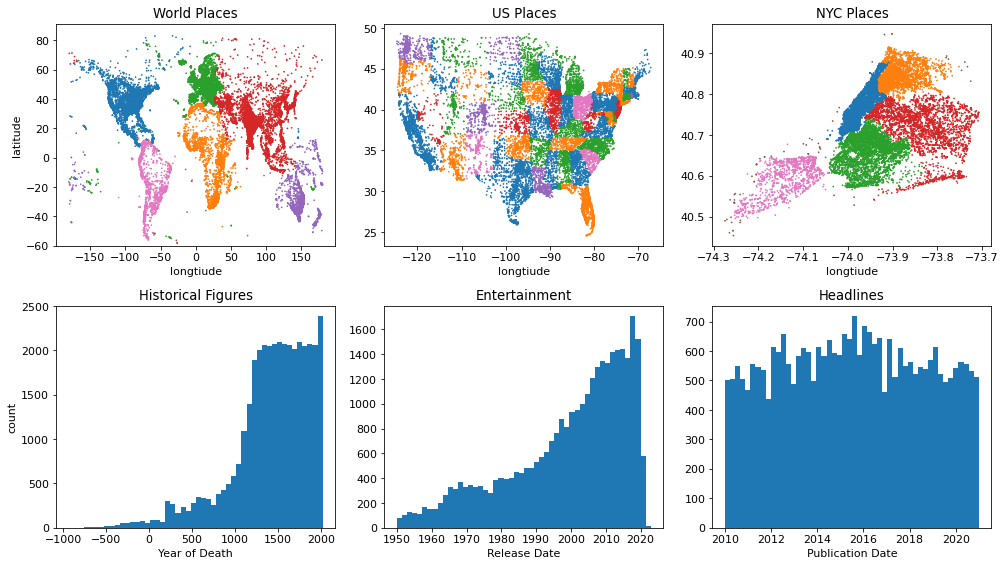

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# set fontsize to 11
plt.rcParams.update({'font.size': 11})

ax = axs[0, 0]
continent_colors = world_df.continent.map(CONTINENT_COLOR_CODES)
ax.scatter(world_df.longitude.values, world_df.latitude.values, s=0.5, c=continent_colors)
ax.set_ylim(bottom=-60)
ax.set_xlabel('longtiude')
ax.set_ylabel('latitude')
ax.set_title('World Places')

ax = axs[0, 1]
state_color = us_df.state_id.apply(lambda x: STATE_COLOR_CODES[state_coloring[x]])
ax.scatter(us_df.longitude.values, us_df.latitude.values, s=0.5, c=state_color)
ax.set_xlabel('longtiude')
ax.set_title('US Places')

ax = axs[0, 2]
nyc_color = nyc_df.borough.fillna(0).astype(np.int32).apply(lambda x: NYC_COLOR_CODES[x])
ax.scatter(nyc_df.longitude.values, nyc_df.latitude.values, s=0.5, c=nyc_color)
ax.set_xlabel('longtiude')
ax.set_title('NYC Places')

ax = axs[1, 0]
ax.hist(figure_df.death_year.values, bins=50)
ax.set_title('Historical Figures')
ax.set_xlabel('Year of Death')
ax.set_ylabel('count')

# Entertainment
ax = axs[1, 1]
ax.hist(pd.to_datetime(art_df.release_date.values), bins=50)
ax.set_title('Entertainment')
ax.set_xlabel('Release Date')

# Headlines
ax = axs[1, 2]
ax.hist(pd.to_datetime(headline_df.pub_date.values), bins=50)
ax.set_title('Headlines')
ax.set_xlabel('Publication Date')

plt.tight_layout()

plt.savefig('figures/dataset_overview.png', dpi=300, bbox_inches='tight')
